In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns

In [3]:
fest  = pd.read_csv('../data_clean/scrapeo/festivos_provincia.csv')
norm = pd.read_csv('../data_clean/scrapeo/normativas.csv')
denu = pd.read_csv('../data_clean/portal_estadistico_vio_gen/denuncias.csv')
llam = pd.read_csv('../data_clean/portal_estadistico_vio_gen/llamadas016.csv')
ord = pd.read_csv('../data_clean/portal_estadistico_vio_gen/ordenes_prot.csv')
disp = pd.read_csv('../data_clean/portal_estadistico_vio_gen/dispositivos.csv')
men = pd.read_csv('../data_clean/portal_estadistico_vio_gen/menores.csv')
vic = pd.read_csv('../data_clean/portal_estadistico_vio_gen/victimas_mortales.csv')
sent = pd.read_csv('../data_clean/ine/sentencias.csv')
tipos = pd.read_csv('../data_clean/ine/tipos_violencias.csv')
cond = pd.read_csv('../data_clean/ine/condenados_edad.csv')
salud = pd.read_csv('../data_clean/ine/salud_mental.csv')
paro = pd.read_csv('../data_clean/ine/tasa_actividad.csv')
alcohol = pd.read_csv('../data_clean/ine/alcohol.csv')
educ = pd.read_csv('../data_clean/ine/nivel_educativo.csv')
total_prov = pd.read_csv('../data_clean/ine/total_prov.csv')
total_ccaa = pd.read_csv('../data_clean/ine/total_ccaa.csv')

ANÁLISIS DENUNCIAS POR VIOLENCIA DE GÉNERO

In [ ]:
denu.describe(include='object').T

,count,unique,top,freq
trimestre,21112,4,primero,5460
origen_denuncia,21112,7,victima,3016
provincia,21112,51,cuenca,812
comunidad,21112,18,castilla y leon,3654


In [62]:
denu.describe()

,año,total_denuncias,tasa_por_1000,total
count,19656.000000,19656.000000,719.000000,1.965600e+04
mean,2015.000000,95.690476,0.610514,4.447777e+05
std,3.741753,290.198855,1.888767,5.898178e+05
min,2009.000000,0.000000,0.000000,3.621600e+04
25%,2012.000000,1.000000,0.007865,1.598730e+05
50%,2015.000000,9.000000,0.066922,2.998115e+05
75%,2018.000000,63.000000,0.404991,5.138440e+05
max,2021.000000,5222.000000,19.789397,3.536095e+06


In [39]:
mujeres_prov = total_prov[total_prov['sexo'] == 'mujeres']
mujeres_prov = mujeres_prov.sort_values(by=['año', 'provincia'])
mujeres_prov

,provincia,sexo,año,total
47,alava,mujeres,2007,153419
102,albacete,mujeres,2007,195338
103,alicante,mujeres,2007,911809
101,almeria,mujeres,2007,313406
26,asturias,mujeres,2007,559570
...,...,...,...,...
1496,valencia,mujeres,2021,1321351
1507,valladolid,mujeres,2021,266518
1530,vizcaya,mujeres,2021,596918
1552,zamora,mujeres,2021,85174


In [7]:
denu.head()

,año,trimestre,origen_denuncia,provincia,comunidad,total_denuncias
0,2009,primero,victima,almeria,andalucia,40
1,2009,primero,familiar,almeria,andalucia,1
2,2009,primero,policia_victima,almeria,andalucia,419
3,2009,primero,policia_familiar,almeria,andalucia,7
4,2009,primero,intervencion_policial_directa,almeria,andalucia,82


In [40]:
denu_filtrado = denu.groupby(['año', 'provincia'], as_index=False)['total_denuncias'].sum()
denu_filtrado.head()

,año,provincia,total_denuncias
0,2009,alava,740
1,2009,albacete,959
2,2009,alicante,7757
3,2009,almeria,2604
4,2009,asturias,2373


In [63]:
# Primero vamos a unir los df de denuncias y de poblacion total de mujeres:
denu_combi = pd.merge(denu_filtrado, mujeres_prov, on=['año', 'provincia'], how='left')

# Ahora vamos a obtener la tasa de denuncias por cada 1000 mujeres:
denu_combi['tasa_por_1000'] = denu_combi['total_denuncias'] / denu_combi['total'] * 1000

# Ahora filtramos para que coincidan los años y las provincias:
denu_combi = denu_combi[denu_combi['año'] >= 2009][['año', 'provincia', 'total_denuncias', 'tasa_por_1000']]

# Por último obtenemos la tasa de denuncias por mujeres (1 de cada x mujeres denunció por violencia de género):
denu_combi['mujeres_por_denuncia'] = 1 / (denu_combi['tasa_por_1000'] / 1000)

In [58]:
denu_combi

,año,provincia,total_denuncias,tasa_por_1000,mujeres_por_denuncia
0,2009,alava,740,4.701368,212.704054
1,2009,albacete,959,4.801506,208.267987
2,2009,alicante,7757,8.090220,123.606033
3,2009,almeria,2604,7.842641,127.508065
4,2009,asturias,2373,4.204666,237.831016
...,...,...,...,...,...
671,2021,valencia,12176,9.214811,108.520943
672,2021,valladolid,1339,5.024051,199.042569
673,2021,vizcaya,3092,5.179941,193.052393
674,2021,zamora,282,3.310870,302.035461


In [60]:
denu_combi.describe().T

,count,mean,std,min,25%,50%,75%,max
año,676.0,2015.000000,3.744428,2009.000000,2012.000000,2015.000000,2018.000000,2021.000000
total_denuncias,676.0,2810.091716,3872.089916,104.000000,740.750000,1542.500000,3096.250000,26965.000000
tasa_por_1000,676.0,6.114116,4.766379,1.632034,3.875873,5.048318,7.030397,47.797866
mujeres_por_denuncia,676.0,208.708917,89.104224,20.921436,142.239648,198.085773,258.006567,612.732394


In [61]:
denu_combi.sort_values(by='mujeres_por_denuncia')  # Se observa que Cuenca es la ciudad con mayor tasa de denuncias por violencia de género durante varios años

,año,provincia,total_denuncias,tasa_por_1000,mujeres_por_denuncia
120,2011,cuenca,1922,47.797866,20.921436
173,2012,cuenca,1666,40.564889,24.651861
537,2019,cuenca,1696,40.511167,24.684552
17,2009,cuenca,1478,38.333852,26.086604
433,2017,cuenca,1592,37.972570,26.334799
...,...,...,...,...,...
253,2013,teruel,130,1.866368,535.800000
403,2016,salamanca,313,1.815840,550.709265
201,2012,teruel,127,1.807829,553.149606
247,2013,salamanca,312,1.766724,566.019231


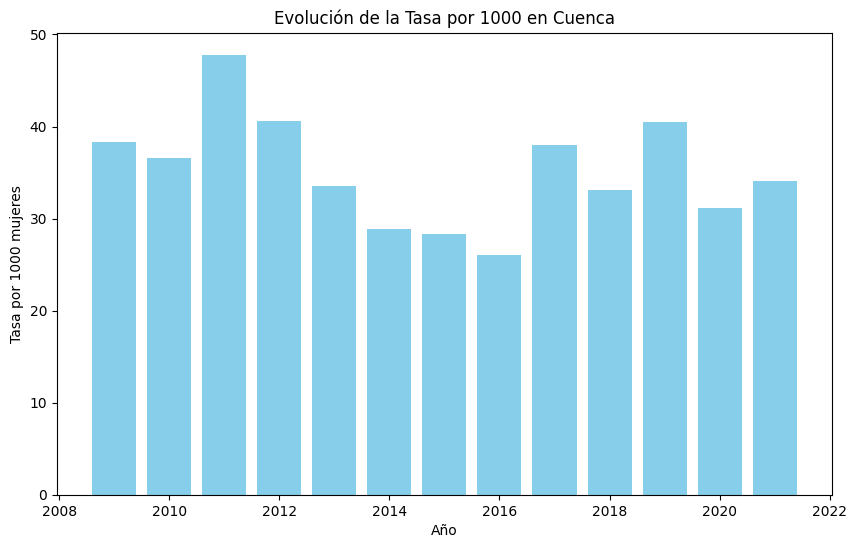

In [82]:
cuenca_data = denu_combi[denu_combi['provincia'] == 'cuenca']

plt.figure(figsize=(10, 6))
plt.bar(cuenca_data['año'], cuenca_data['tasa_por_1000'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Tasa por 1000 mujeres')
plt.title('Evolución de la Tasa por 1000 en Cuenca')
plt.show()

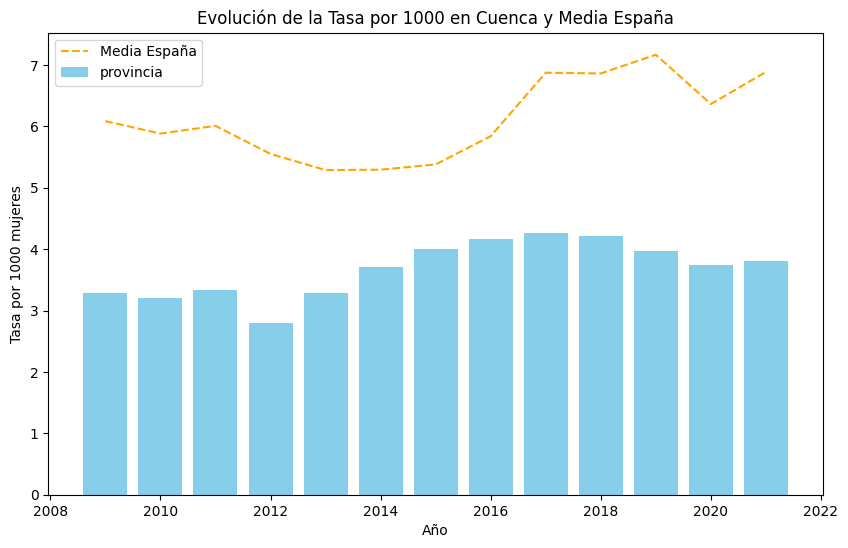

In [95]:
# Filtrar el DataFrame para la provincia de Cuenca
pro = denu_combi[denu_combi['provincia'] == 'leon']

# Calcular la media total de España
media_total_denu = denu_combi.groupby('año')['tasa_por_1000'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Línea para la provincia
plt.bar(pro['año'], pro['tasa_por_1000'], color='skyblue', label= 'provincia')

# Línea para la media total de España
plt.plot(media_total_denu['año'], media_total_denu['tasa_por_1000'], linestyle='--', color='orange', label='Media España')

plt.xlabel('Año')
plt.ylabel('Tasa por 1000 mujeres')
plt.title('Evolución de la Tasa por 1000 en Cuenca y Media España')
plt.legend()
plt.show()

ANALISIS LLAMADAS

llam.groupby('llamante')['total_llamadas'].sum()

In [ ]:
llam.describe(include='object').T

In [ ]:
llam.groupby('llamante')['total_llamadas'].sum()

In [ ]:
llam.groupby('trimestre')['total_llamadas'].sum()

In [ ]:
llam.groupby('provincia')['total_llamadas'].sum().sort_values(ascending=False)

In [ ]:
men.groupby('edad')['total_menores_vict_mortales'].sum()